Assignment 1

Matthew Patrolia

Bastrop, TX Groundwater Levels

Water Year 2011:2017, measurements taken every 12 hours (midnight and noon)

In [1]:
import pandas as pd # Required for data management
import numpy as np # Required for some computations
import matplotlib.pyplot as plt # Required for plotting
import datetime as DT #Required to create SerDates for my hourly data

Import all of the libraries needed for this assignment. 

Pandas is required for data management. Numpy is required for computation. Matplot.lib is required for plotting. Datetime is required to create SerDates for my hourly data. 

[[2010   10    1    0]
 [2010   10    1   12]
 [2010   10    2    0]
 ..., 
 [2017    9   29   12]
 [2017    9   30    0]
 [2017    9   30   12]]
[   0    1    2 ..., 4809 4810 4811]


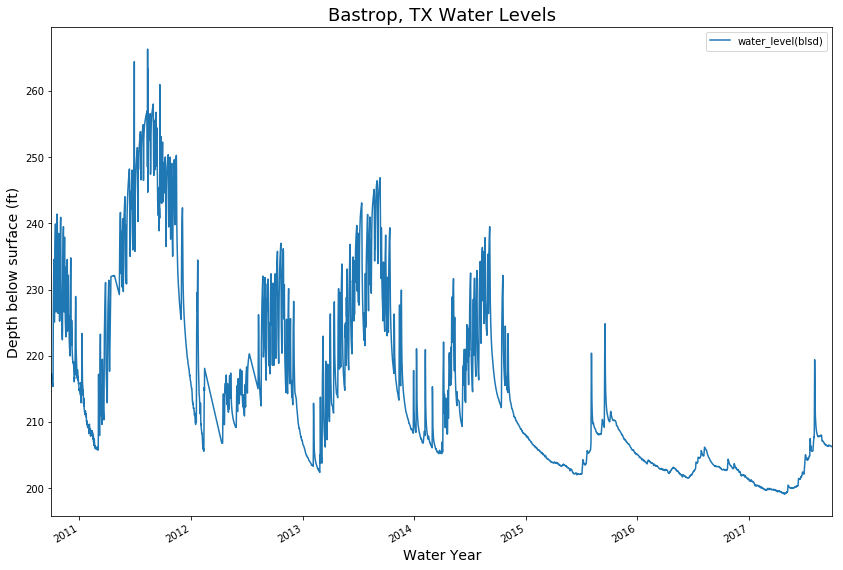

In [2]:
df = pd.read_csv('BastropWell.csv', header=0) #reads the csv file
DateArray = df.as_matrix() #creates a numpy matrix called DateArray
DateArray = DateArray[:,0:4].astype(int) #checking to see if DateArray is correct
print(DateArray) #checking to see if DateArray is correct
SerDates = [DT.datetime(*x) for x in DateArray] #creating SerDates using a datetime for loop and the the DateArray matrix 

df['SerDates'] = SerDates #calls the 'SerDates' SerDates in the data frame

WL = df['water_level(blsd)'].values # uses pandas to load the values of water level from the csv file into a numpy array called "WL"

daynumber=np.arange(0,np.size(WL), 1) #arange creates a matrix of evenly spaced values. I chose for the matrix to go from 0 to the length of WL incrementing by 1
print(daynumber) #prints daynumber to check that it was successful

df.plot(df['SerDates'].values, y='water_level(blsd)',figsize=(14,10)) #plots SerDates on the x axis and WL on the y axis. Make figure sixe 14 by 10
plt.title('Bastrop, TX Water Levels', fontSize=18) #give the plot a title with size 18 font
plt.xlabel('Water Year', fontSize=14) #label the x axis with a font size of 14
plt.ylabel('Depth below surface (ft)', fontSize=14) #label the y axis with a font size of 14
plt.show() #show the plot


The code above reads my .csv file, creates SerDates using datetime in a for loop, and plots the water level data through time.

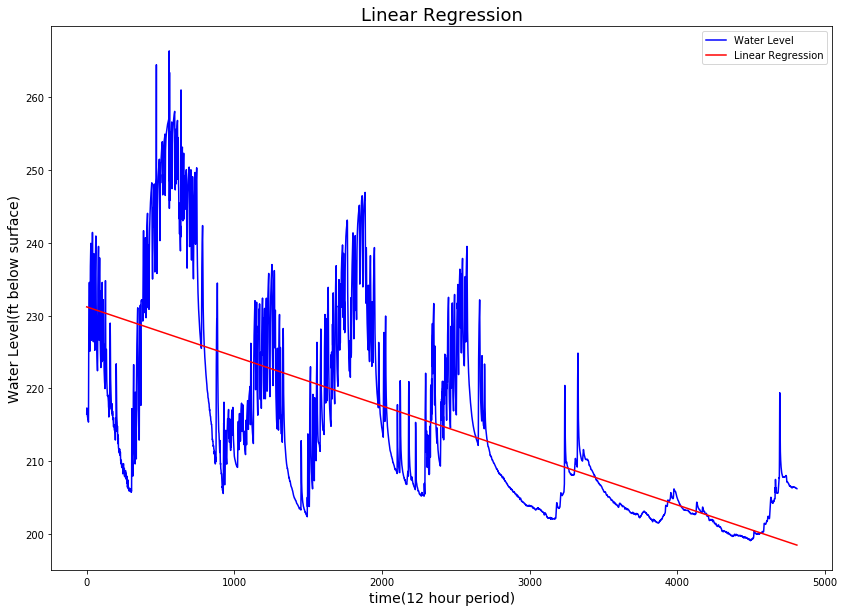

[ -6.79768042e-03   2.31199237e+02]


In [18]:
reg=np.polyfit(daynumber, WL, 1) #performs a least squares polynomial fit 
fit_fn=np.poly1d(reg) # one dimensional polynomial class of the least squares fit. 

plt.figure(figsize=(14,10)) #Creates a figure sixe 14 by 10
plt.plot(daynumber, WL, 'b', daynumber, fit_fn(daynumber), 'r') #plots groundwater levels in blue and the linear regression line in red.
plt.legend(['Water Level', 'Linear Regression']) #Creates a legend
plt.xlabel('time(12 hour period)', fontSize=14) #labels the x axis with font size 14
plt.ylabel('Water Level(ft below surface)', fontSize=14) #labels the y axis with a font size of 14 
plt.title('Linear Regression', fontSize=18) #titles the plot with a font size of 18
plt.show() #shows the plot
print(reg) #prints the polyfit values(the slope and intercept of the line)

This code plots the water level data in blue and the linear regression line in red. 

My data exhibits stationarity because the slope of the linear regression is almost zero. 

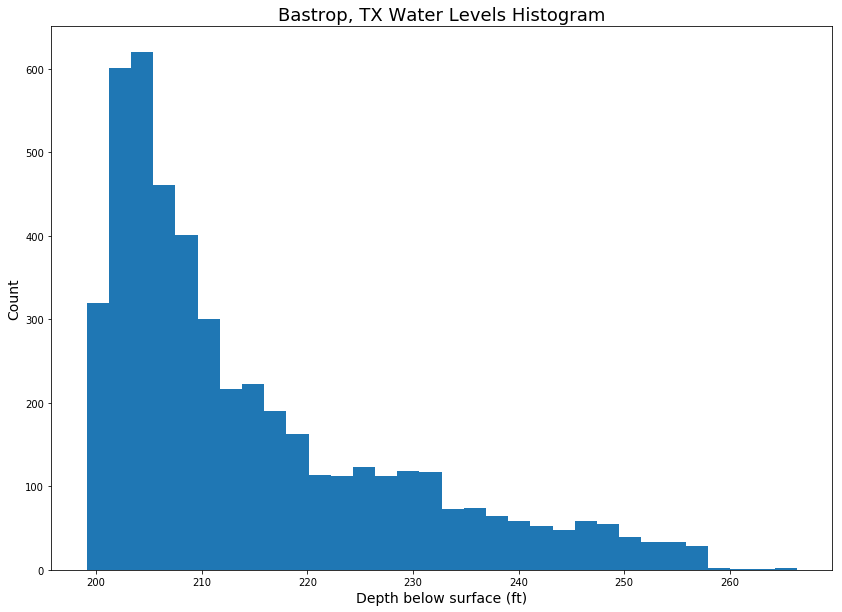

mean water level= 214.847416874 ft
water level variance = 194.913792933


In [21]:
plt.figure(figsize=(14,10)) #Creates a figure sixe 14 by 10
plt.hist(WL, bins='auto') #uses the .hist to create a histogram of the water levels with auto bin sizes
plt.title('Bastrop, TX Water Levels Histogram', fontSize=18) # titles the plot
plt.ylabel('Count', fontSize=14) #labels the y axis
plt.xlabel('Depth below surface (ft)', fontSize=14) #labels the x axis 
plt.show() #show the plot

mean=np.mean(WL) #compute the mean value of the water level measurements using numpy
print( "mean water level=", mean ,"ft") #print the value of the mean

variance= np.var(WL) #compute the variance using numpy
print("water level variance =", variance) #display the variance value

This shows a histogram of the depth of water below the surface by count. The mean water level is 214.85 ft and the variance is 194.91. 

In [5]:
#diff = list()
#for i in range(1, len(WL)):
    #value = WL[i] - WL[i - 1]
    #diff.append(value)
#plt.figure(figsize=(14,10))
#plt.title('Detrend')
#plt.plot(diff)
#plt.show()

This code shows the detrended version of my data.

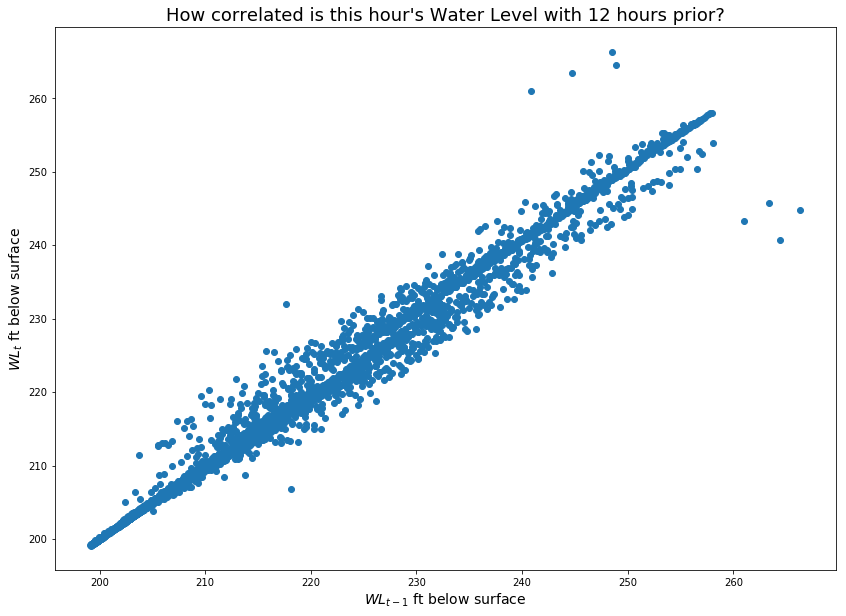

Correlation coefficient = 0.992084913749


In [22]:
WLt   = WL[1:-1] #use numpy array indexing to get water levels from October 2 2011 to September 30 2017
WLtm1 = WL[0:-2] #use numpy array indexing to get water levels from Ovtober 1 2011 to September 29 2017

plt.figure(figsize=(14,10)) #create figure 
plt.plot(WLtm1,WLt,'o')  # Use Matplotlib to create a scatter plot of these two time series
plt.title('How correlated is this hour\'s Water Level with 12 hours prior?', fontSize=18) #title plot
plt.xlabel('$WL_{t-1}$ ft below surface', fontSize=14) #label x axis
plt.ylabel('$WL_t$ ft below surface', fontSize=14) #label y axis 
plt.show() #show plot



df.to_pickle('Bastrop_WY2011-2017.pkl') #Save the dataframe as a pandas "pickle" file

R = np.corrcoef(WLtm1,WLt) #compute the correlation coefficient of the two time series.
print("Correlation coefficient =", R[1,0]) #print the correlation coefficient

This portion of the code correlates this hour's water level measurement with the previous measurement taken twelve hours prior.

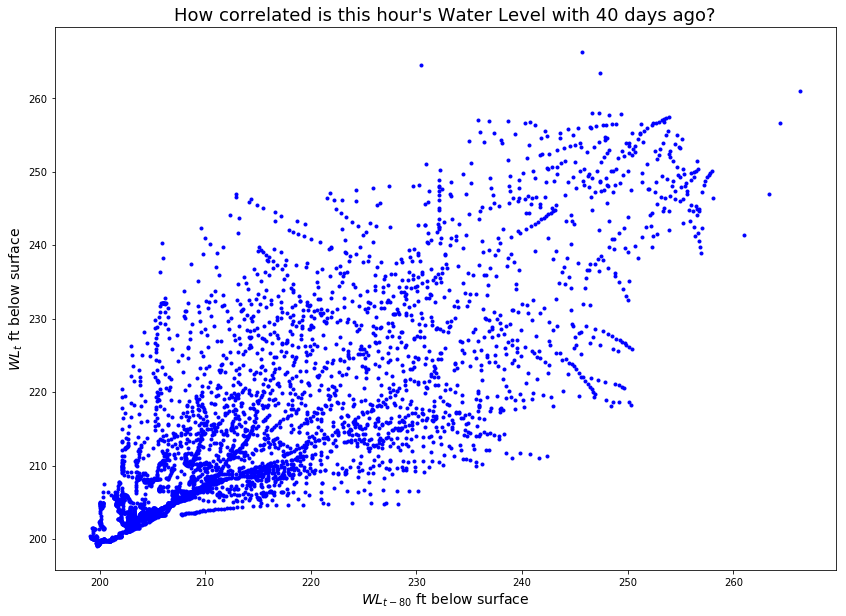

Correlation coefficient = 0.808242307173


In [23]:
WLt   = WL[80:-1] #use numpy array indexing to get a time series from October 2 to 40 days prior (my data is in 12 hour increments)
WLtmk = WL[0:-(81)] #use numpy array indexing to get a time series from October 1 to 40 days prior

plt.figure(figsize=(14,10)) #create figure size (14,10)
plt.plot(WLtmk,WLt,'b.')# Use Matplotlib to create a scatter plot of these two time series
plt.title('How correlated is this hour\'s Water Level with 40 days ago?', fontSize=18) #title figure
plt.xlabel('$WL_{t-80}$ ft below surface', fontSize=14) #label x axis 
plt.ylabel('$WL_t$ ft below surface', fontSize=14) # label y axis
plt.show() #show plot

R = np.corrcoef(WLtmk,WLt) #compute correlation coefficient
print("Correlation coefficient =",R[1,0]) #show the correlation coefficient

This code correlates the water levels 40 days apart, and returns the correlation coefficient.

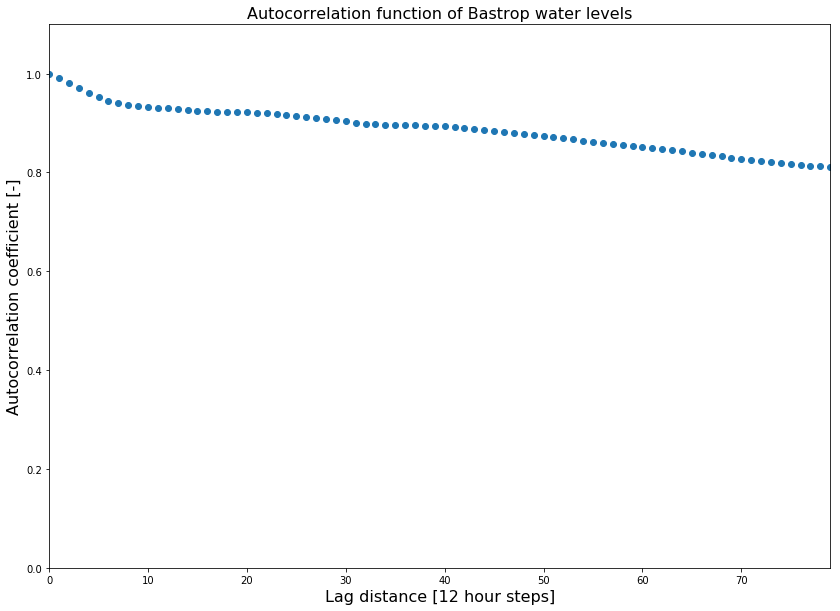

In [25]:
Nk = 80 #create a value Nk equal to 80
K  = np.arange(0,Nk,1) #create a matrix from 0 to Nk incrementing by 1
Rk = np.zeros((Nk,1)) #create a matrix of zeroes with dimensions (Nk,1)

for k in K: #loop for every k in the K matrix...
    WLt   = WL[k:-1] #create WLt for k to one time step from the end
    WLtmk = WL[0:-(1+k)] #create WLtmk from 0 to -(1+k) steps from the end
    R = np.corrcoef(WLtmk,WLt) #compute the correlation coefficient
    Rk[k] = R[1,0] #index the R[1,0] value to Rk[k]
  

plt.figure(figsize=(14,10)) #create figure 
plt.plot(K,Rk,'o') #plot lag distance on X and the correlation coefficient on the y axis
plt.xlim(0.0,np.amax(K.astype(float))) #create the x limits of the graph
plt.ylim(0.0,1.1) #create the y limits of the graph
plt.title('Autocorrelation function of Bastrop water levels',fontsize=16) #create title
plt.xlabel('Lag distance [12 hour steps]',fontsize=16) #label x axis
plt.ylabel('Autocorrelation coefficient [-]',fontsize=16) #label y axis
plt.show() #show plot

This code computes the autocorrelation for lags from zero to 40 days, and plots the correlation coefficients.

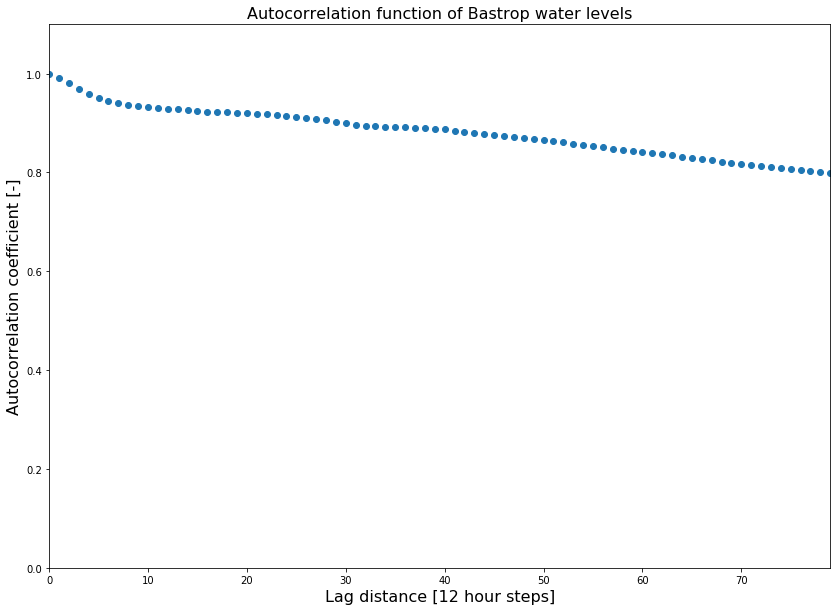

In [26]:
WLp = WL - np.mean(WL) #subtracts WL from the mean of the WL

autocovs2 = np.correlate(WLp, WLp, mode='full') #returns the cross correlation of WLp and WLp

N = autocovs2.size #creates N with the size of autocovs2
autocovs2_oneside = autocovs2[N//2:] 
autocorrs2_oneside = autocovs2_oneside/autocovs2_oneside[0]

plt.figure(figsize=(14,10)) #creates figure
plt.plot(K,autocorrs2_oneside[0:Nk],'o') #plots lag distance against the autocorrelation coefficient
plt.ylim(0.0,1.1) #sets y limit
plt.xlim(0.0,np.amax(K.astype(float))) #sets the x limit
plt.title('Autocorrelation function of Bastrop water levels',fontsize=16) #title the plot
plt.xlabel('Lag distance [12 hour steps]',fontsize=16) #labels x axis
plt.ylabel('Autocorrelation coefficient [-]',fontsize=16) #labels y axis
plt.show() #shows plot

This code computes the autocorrelation a slightly different way for lags from zero to 40 days, and plots the correlation coefficients.

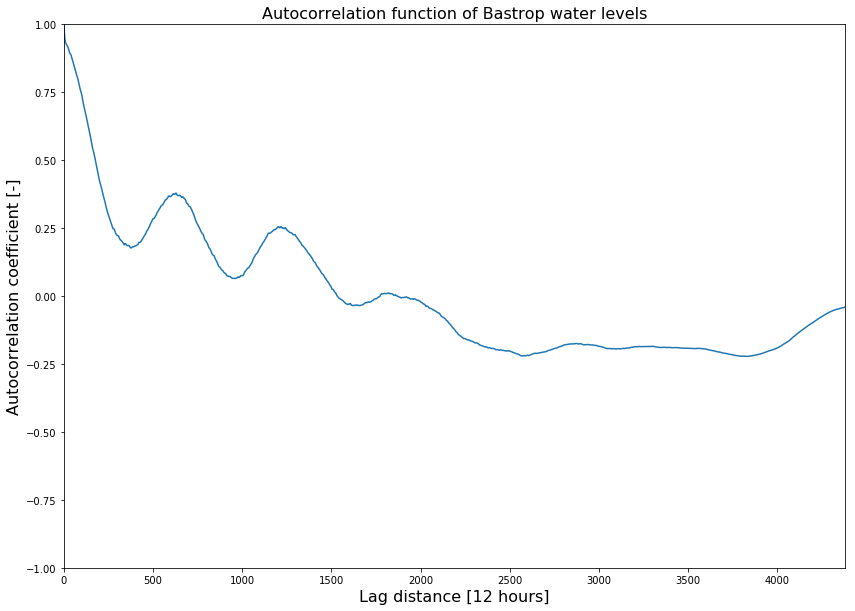

In [27]:
Nk2 = 365*12 #creates N2 for 6 years. Again, this data is in 12 hour increments
K2 = np.arange(0,Nk2,1) #create a matrix from 0 to Nk2 by 1

plt.figure(figsize=(14,10)) #create figure
plt.plot(K2,autocorrs2_oneside[0:Nk2],'-') #plot autocorrelation
plt.ylim(-1.0,1.0) #set y limit of graph
plt.xlim(0.0,np.amax(K2.astype(float))) #set x limit of graph
plt.title('Autocorrelation function of Bastrop water levels',fontsize=16) #title graph
plt.xlabel('Lag distance [12 hours]',fontsize=16) #label x axis
plt.ylabel('Autocorrelation coefficient [-]',fontsize=16) #label y axis
plt.show() #show plot

This code computes an autocorrelation for the 6 years of data

Analysis

I expected that the groundwater levels would be highly correlated. Groundwater flow is slow, and this specific area is not being pumped on a regular basis. I do see the same general trends from year to year and groundwater levels are shallowing slightly. The autocorrelation shows a correlation coefficient of .99.  Over a 12 hour period, one would not expect the groundwater levels to change much, if at all.  Groundwater levels with a lag time of 40 days are still correlated, which also is to be expected. This is supported by an autocorrelation coefficient of .81. Because groundwater flow is so slow, I expect to see very high autocorrelation numbers. As expected, these numbers decrease with larger time steps but overall are still highly correlated across the entire data set. Other than seasonal changes, the only other factors affecting groundwater levels in this well would be a change in pumping in the aquifer. 